# Module 12 - The Diffusion Equation

## Goals

- Numerical solutions to the diffusion equation
- Differential equations in space and time


In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

## One-dimensional diffusion equation

The one-dimensional diffusion equation can be written as

\begin{equation}
    \frac{\partial \rho (x,t)}{\partial t} = D \frac{\partial^2 \rho (x,t)}{\partial x^2},
\end{equation}

where $\rho (x,t)$ is the local concentration of molecules/particles at a point in time $t$ and position $x$, and $D$ is the diffusion coefficient of the molecule of interest. We can solve this differential equation by discretizing our system, $\\rho (x,t) = \rho (i\Delta x, n\Delta t) = \rho (i, n)$, and using finite difference methods. First, we expand $\rho(x,t)$ to a time $t + \Delta t$ keeping only up to first order terms

\begin{equation}
    \rho (x, t+\Delta t) \approx \rho (x,t) + \frac{\partial \rho (x,t)}{\partial t} \Delta t
\end{equation}

to obtain an epxression for the left hand side of the partial differential equation

\begin{equation}
    \frac{\partial \rho (x,t)}{\partial t} = \frac{\rho (x, t+\Delta t) - \rho (x,t)}{\Delta t}.
\end{equation}

We can then expand $\rho(x,t)$ to positions $x \pm \Delta x$ keeping up to second order terms

\begin{align}
    \rho (x + \Delta x, t) &\approx \rho (x,t) + \frac{\partial \rho (x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 \rho (x,t)}{\partial x^2} (\Delta x)^2 \\
    \rho (x - \Delta x, t) &\approx \rho (x,t) - \frac{\partial \rho (x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 \rho (x,t)}{\partial x^2} (\Delta x)^2
\end{align}

and combine them

\begin{align}
    \rho (x + \Delta x, t) + \rho (x - \Delta x, t) &= 2\rho (x,t) + \frac{\partial^2 \rho (x,t)}{\partial x^2} (\Delta x)^2
\end{align}

to obtain an epxression for the right hand side of the partial differential equation

\begin{equation}
    D \frac{\partial^2 \rho (x,t)}{\partial x^2} = D \frac{\rho (x + \Delta x, t) + \rho (x - \Delta x, t) - 2\rho (x,t)}{(\Delta x)^2}.
\end{equation}

Putting all this together in index form we get

\begin{align}
    \frac{\rho (i, n+1) - \rho (i,n)}{\Delta t} &= D \frac{\rho (i+1, n) + \rho (i - 1, n) - 2\rho (i,n)}{(\Delta x)^2} \\
    \rho (i, n+1) &= \rho (i,n) + \frac{D \Delta t}{(\Delta x)^2}\left[ \rho (i+1, n) + \rho (i - 1, n) - 2\rho (i,n) \right ].
\end{align}

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a code that solves the 1-dimensional diffusion equation using the finite difference equation shown above for an initial set of conditions. We need to discretize both time and space, so it will be helpful to create a 2-dimensional array that will store the concentration of particles for every position and time. A simple initial condition ($t=0$) is a point source with a given concentration in the center of the grid ( $\rho (i_\text{center}, 0) = 1$ ) and 0 otherwise. A diffusion coefficient of $D = \text{1E-3}$ is appropriate for a spatial grid size of 100 ($\Delta x = 1/100$) and 1000 time iterations ($\Delta t = 1/1000$). Use periodic boundary conditions to find the particle densities at the edges of the box.
</div>

<IPython.core.display.Javascript object>


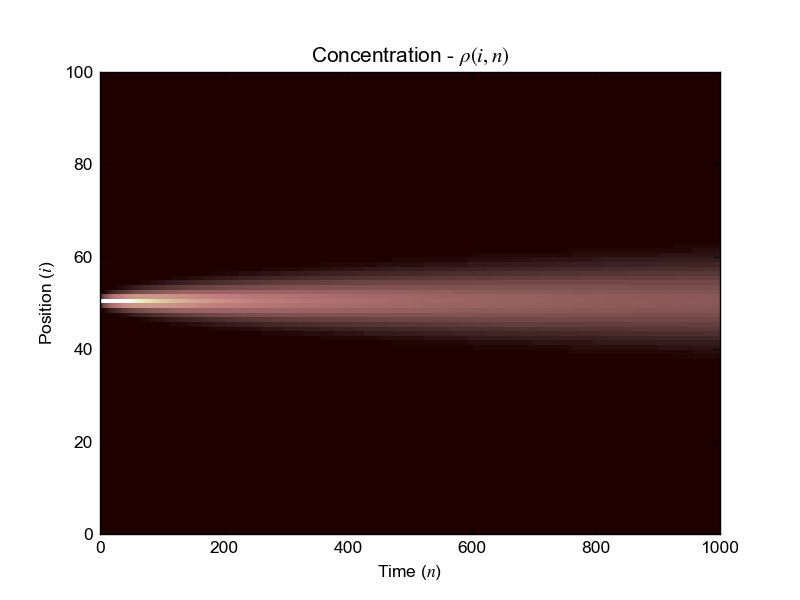

In [9]:
D = 1E-3           # Diffusion coefficient

x_grid_size = 100  # size of discretized space in x
L = 1              # actual length of space considered
dx = L/x_grid_size

t_iter = 1000        # number of time iterations
tmax = 1.0           # time to be explored
dt = tmax/t_iter

rho = np.zeros((x_grid_size, t_iter))  # particle concentration at any point in space and time

rho[x_grid_size//2, 0] = 1.0  # set the initial configuration, t=0, of the system as a single point source in the center

for n in range(t_iter-1):
    for i in range(x_grid_size-1):
        rho[i, n+1] = rho[i, n] +(D*dt/dx**2)*(rho[i+1, n] + rho[i-1, n] - 2*rho[i, n])
    # we are using periodic boundary conditions, so we must be careful at the edges of space
    # for the left edge, i=0, there is no problem because i=-1 gives us the value at the right edge of box
    # but for the right edge, i=x_grid_size-1, the i-1 term must be set to 0 to get the value at the left edge of box
    #rho[x_grid_size-1, n+1] = rho[x_grid_size-1, n] +(D*dt/dx**2)*(rho[0, n] + rho[x_grid_size-2, n] - 2*rho[x_grid_size-1, n])
    rho[-1, n+1] = rho[-1, n] +(D*dt/dx**2)*(rho[0, n] + rho[-2, n] - 2*rho[-1, n])
plt.figure()
plt.pcolormesh(rho, vmin=0, vmax=0.5, cmap='pink')
plt.xlabel(r'Time ($n$)')
plt.ylabel(r'Position ($i$)')
plt.title(r'Concentration - $\rho (i, n)$')

<IPython.core.display.Javascript object>


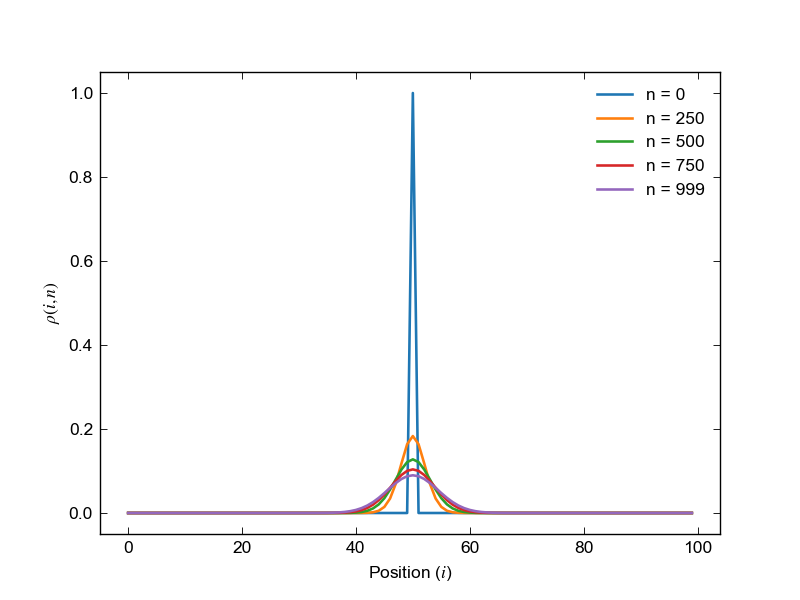

In [10]:
plt.figure()
for t in (0, t_iter//4, t_iter//2, 3*t_iter//4, t_iter-1):
    plt.plot(rho[:, t], label = 'n = {0:d}'.format(t))

plt.xlabel(r'Position ($i$)')
plt.ylabel(r'$\rho (i,n)$')
plt.legend()

### Point source and random walker

Last time we talked about the probability of finding a random walker at some position $x$ after taking so many steps, $N$ and obtained

\begin{equation}
    P(x;N) = \frac{1}{\sqrt{2\pi N a^2}} e^{-x^2/2Na^2}.
\end{equation}

The solution to the 1-dimensional diffusion equation for an ideal point source is also a Gaussian function

\begin{equation}
    \rho(x,t) = \frac{\rho_0}{\sqrt{4\pi D t}} e^{-x^2/4Dt},
\end{equation}

where the mean squared displacement is $\left < x^2 \right > = 2Dt$.

## Different initial conditions - Fluorescence Recovery After Photobleaching (FRAP)

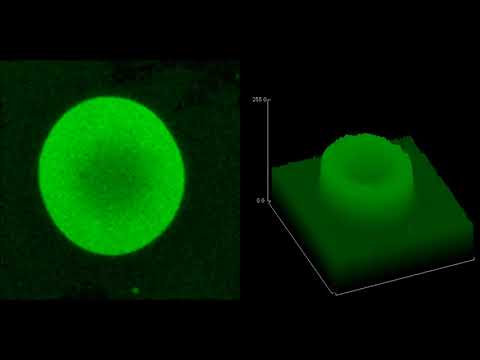

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('TH0bCijDv_g', width=600, height=400)

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Change the initial conditions ($t=0$) so that there is a uniform concentration of particles over the entire box ( $\rho (i, 0) = 1$ ) except for a 'bleached' spot at the center where the concentration is 0 ( $\rho (i_\text{center}\pm 5, 0) = 0$ ). A diffusion coefficient of $D = \text{1E-3}$ is appropriate for a spatial grid size of 100 ($\Delta x = 1/100$) and 1000 time iterations ($\Delta t = 1/1000$). Use periodic boundary conditions to find the particle densities at the edges of the box.
</div>

<IPython.core.display.Javascript object>


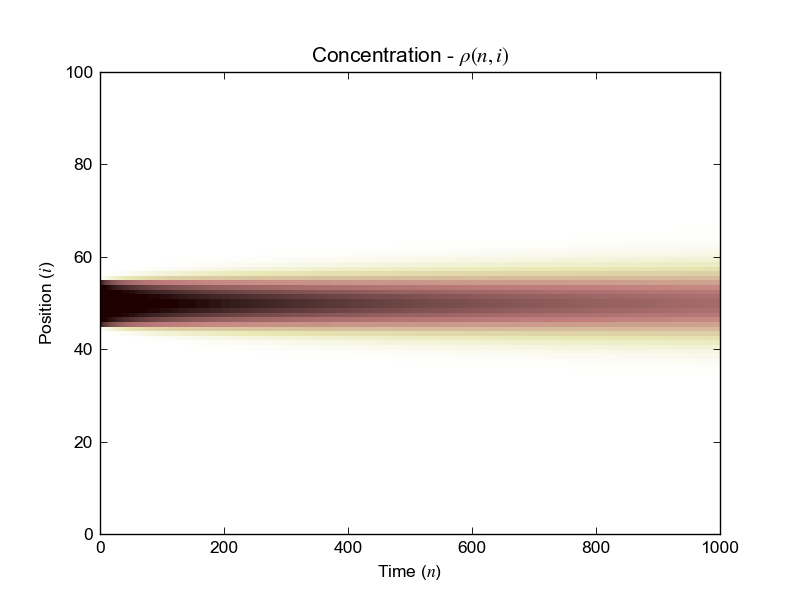

<IPython.core.display.Javascript object>


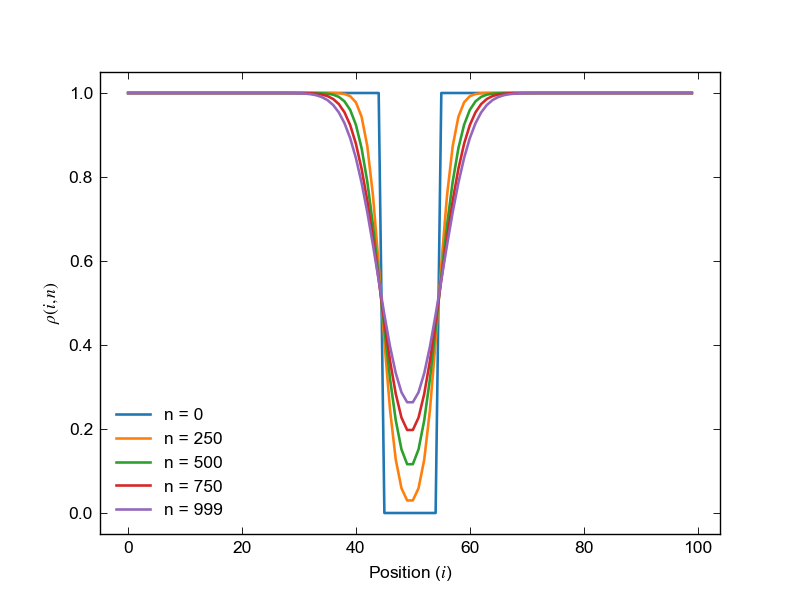

In [12]:
D = 1E-3             # Diffusion coefficient

x_grid_size = 100    # size of discretized space in x
L = 1.0              # actual length of space considered
dx = L/x_grid_size

t_iter = 1000        # number of time iterations
tmax = 1.0           # time to be explored
dt = tmax/t_iter

rho = np.ones((x_grid_size, t_iter))  # particle concentration at any point in space and time

for i in range(x_grid_size//2 - 5, x_grid_size//2 + 5):
    rho[i, 0] = 0.0  # set the initial configuration, t=0, of the system as a a uniform concentration with a 'bleached'
                     # spot in the center

for n in range(t_iter-1):
    for i in range(x_grid_size-1):
        rho[i, n+1] = rho[i, n] +(D*dt/dx**2)*(rho[i+1, n] + rho[i-1, n] - 2*rho[i, n])
    # we are using periodic boundary conditions, so we must be careful at the edges of space
    # for the left edge, i=0, there is no problem because i=-1 gives us the value at the right edge of box
    # but for the right edge, i=x_grid_size-1, the i-1 term must be set to 0 to get the value at the left edge of box
    rho[x_grid_size-1, n+1] = rho[x_grid_size-1, n] +(D*dt/dx**2)*(rho[0, n] + rho[i-1, n] - 2*rho[x_grid_size-1, n])

plt.figure()
plt.pcolormesh(rho, vmin=0, vmax=1, cmap='pink')
plt.xlabel(r'Time ($n$)')
plt.ylabel(r'Position ($i$)')
plt.title(r'Concentration - $\rho (n, i)$')

plt.figure()
for t in (0, t_iter//4, t_iter//2, 3*t_iter//4, t_iter-1):
    plt.plot(rho[:, t], label = 'n = {0:d}'.format(t))

plt.xlabel(r'Position ($i$)')
plt.ylabel(r'$\rho (i,n)$')
plt.legend()

<IPython.core.display.Javascript object>


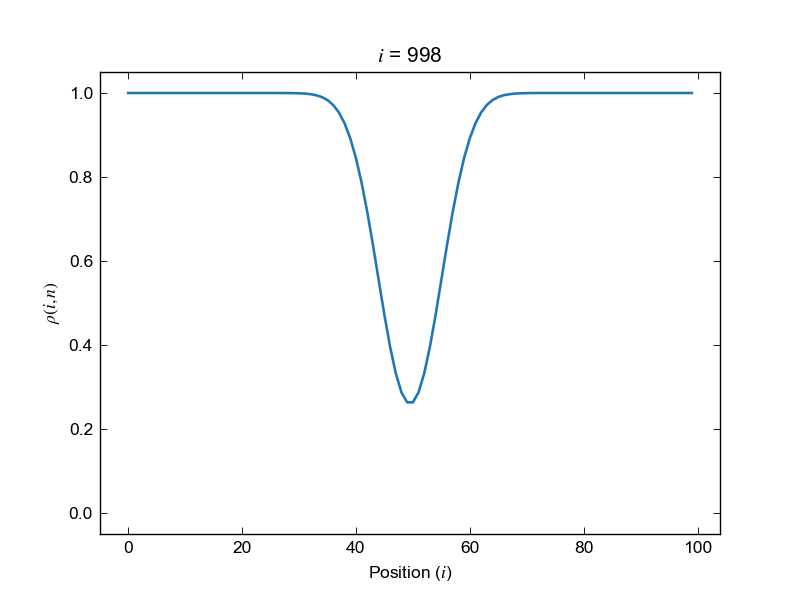

In [13]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook
fig, ax = plt.subplots()
line = ax.plot(rho[:,0])[0]
plt.xlabel(r'Position ($i$)')
plt.ylabel(r'$\rho (i,n)$')
def animate(i):
    line.set_ydata(rho[:,i])
    ax.set_title(r'$i$ = {0}'.format(i))
anim = FuncAnimation(fig, animate, interval=10, frames=t_iter-1, repeat=False)
plt.draw()
plt.show()